In [1]:
# ! pip install chart-studio

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore') 
from datetime import datetime

sns.set()
#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML
                        
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)


# 데이터 불러오기

In [3]:
df = pd.read_csv('./datasets/블록별 성별연령대별 카드소비패턴.csv',encoding='cp949')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   서울시민업종코드(UPJONG_CD)  500 non-null    object
 1   기준년월(YM)             500 non-null    int64 
 2   고객주소블록코드(BLOCK_CD)   500 non-null    int64 
 3   성별(GEDNER)           500 non-null    object
 4   연령대별(AGE)            500 non-null    object
 5   카드이용금액계(AMT_CORR)    500 non-null    int64 
 6   카드이용건수계(USECT_CORR)  500 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 27.5+ KB


----

In [4]:
df2 = pd.read_csv('./datasets/블록별 시간대별소액결제건수 카드소비패턴.csv',encoding='cp949',parse_dates=['기준년월(YM)'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   서울시민업종코드(UPJONG_CD)  500 non-null    object
 1   기준년월(YM)             500 non-null    object
 2   시간대구간(TIME)          500 non-null    int64 
 3   고객주소블록코드(BLOCK_CD)   500 non-null    int64 
 4   카드이용금액계(AMT_CORR)    500 non-null    int64 
 5   소액결제건수(MICRO_PYM)    500 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 23.6+ KB


In [5]:
df2 = df2.drop('고객주소블록코드(BLOCK_CD)',axis=1)

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   서울시민업종코드(UPJONG_CD)  500 non-null    object
 1   기준년월(YM)             500 non-null    object
 2   시간대구간(TIME)          500 non-null    int64 
 3   카드이용금액계(AMT_CORR)    500 non-null    int64 
 4   소액결제건수(MICRO_PYM)    500 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 19.7+ KB


----

In [7]:
df3 = pd.read_csv('./datasets/집계구별 일별소비지역별 카드소비패턴.csv',encoding='cp949')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   가맹점주소광역시도(SIDO)       500 non-null    object
 1   가맹점주소시군구(SGG)         442 non-null    object
 2   업종대분류(UPJONG_CLASS1)  500 non-null    object
 3   기준일자(YMD)             500 non-null    int64 
 4   고객주소집계구별(TOT_REG_CD)  500 non-null    int64 
 5   카드이용금액계(AMT_CORR)     500 non-null    int64 
 6   카드이용건수계(USECT_CORR)   500 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 27.5+ KB


In [8]:
df4 = pd.read_csv('./datasets/집계구별 일별시간대별 카드소비패턴.csv',encoding='cp949')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   업종대분류(UPJONG_CLASS1)  500 non-null    object
 1   기준일자(YMD)             500 non-null    int64 
 2   시간대구간(TIME)           500 non-null    int64 
 3   고객주소집계구별(TOT_REG_CD)  500 non-null    int64 
 4   카드이용금액계(AMT_CORR)     500 non-null    int64 
 5   카드이용건수계(USECT_CORR)   500 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 23.6+ KB


In [9]:
df5 = pd.read_csv('./datasets/카드소비 업종코드.csv',encoding='cp949')
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   업종코드(UPJONG_CD)  75 non-null     object
 1   대분류(CLASS1)      75 non-null     object
 2   중분류(CLASS2)      75 non-null     object
 3   소분류(CLASS3)      75 non-null     object
dtypes: object(4)
memory usage: 2.5+ KB


In [10]:
df6=pd.read_csv('./datasets/소비자물가지수.csv',encoding='cp949')
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점      85 non-null     float64
 1   전국      85 non-null     float64
dtypes: float64(2)
memory usage: 1.5 KB


----

# df2 

## dfdf -> df2와 df5를 합치기위한 과정
<pre>
 0   업종코드     500 non-null    object        
 1   기준년월     500 non-null    object        
 2   시간대구간    500 non-null    int64         
 3   카드이용금액계  500 non-null    int64         
 4   소액결제건수   500 non-null    int64         
 5   대분류      500 non-null    object        
 6   중분류      500 non-null    object        
 7   소분류      500 non-null    object        
 8   ym       500 non-null    datetime64[ns]
 9   y        500 non-null    int64         
 10  m        500 non-null    int64  

In [11]:
df2.columns

Index(['서울시민업종코드(UPJONG_CD)', '기준년월(YM)', '시간대구간(TIME)', '카드이용금액계(AMT_CORR)',
       '소액결제건수(MICRO_PYM)'],
      dtype='object')

* '카드이용금액계(AMT_CORR)' -> '카드이용건수'
* 분류 합치기

In [12]:
df2.rename(columns = {'서울시민업종코드(UPJONG_CD)' : '업종코드','기준년월(YM)' : '기준년월', '시간대구간(TIME)' : '시간대구간', '카드이용금액계(AMT_CORR)' : '카드이용건수' , '소액결제건수(MICRO_PYM)' : '소액결제건수'}, inplace = True)
df5.rename(columns = {'업종코드(UPJONG_CD)' : '업종코드', '대분류(CLASS1)' : '대분류', '중분류(CLASS2)' : '중분류', '소분류(CLASS3)' : '소분류'}, inplace = True)
df5['업종코드'] = df5['업종코드'].str.upper()
dfdf = pd.merge(df2, df5, on='업종코드', how='left')

In [13]:
dfdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   업종코드    500 non-null    object
 1   기준년월    500 non-null    object
 2   시간대구간   500 non-null    int64 
 3   카드이용건수  500 non-null    int64 
 4   소액결제건수  500 non-null    int64 
 5   대분류     500 non-null    object
 6   중분류     500 non-null    object
 7   소분류     500 non-null    object
dtypes: int64(3), object(5)
memory usage: 35.2+ KB


In [14]:
df2 = dfdf[['기준년월', '시간대구간', '카드이용건수', '소액결제건수', '대분류','중분류','소분류']]
df2.columns

Index(['기준년월', '시간대구간', '카드이용건수', '소액결제건수', '대분류', '중분류', '소분류'], dtype='object')

## 분류 재정의

<분류 재정리>
<pre>
가전/가구        11
가정생활/서비스     56
------------------------- (가정생활)
교육/학원        19
------------------------- (교육)
스포츠/문화/레저    50
여행/교통          12
------------------------- (문화)
주유           25
자동차           7
------------------------- (교통)
요식/유흥        94
음/식료품        30
------------------------ (식품)
유통           68
-------------------- (유통)
의료           50
----------------------- (의료)
의류/잡화        17
미용           11
---------------------- (패션)
전자상거래        44
-------------------------- (전자상거래)

총 9개

In [15]:
df2['대분류'] = df2['대분류'].replace(['가전/가구','가정생활/서비스'],'가정생활')
df2['대분류'] = df2['대분류'].replace('교육/학원','교육')
df2['대분류'] = df2['대분류'].replace(['스포츠/문화/레저','여행/교통'],'문화')
df2['대분류'] = df2['대분류'].replace(['주유','자동차'],'교통')
df2['대분류'] = df2['대분류'].replace(['요식/유흥','음/식료품'],'식품')
df2['대분류'] = df2['대분류'].replace(['의류/잡화','미용'],'패션')
df2['대분류'].nunique()

9

---

## 소분류별 전체 건수

In [16]:
df2['대분류'].nunique(), df2['대분류'].unique()

(9,
 array(['유통', '의료', '문화', '패션', '식품', '가정생활', '전자상거래', '교통', '교육'],
       dtype=object))

In [17]:
df2[df2['대분류'] == '유통']['소분류'].unique()

array(['기타유통', '할인점/슈퍼마켓', '편의점', '생활잡화', '백화점', '슈퍼마켓'], dtype=object)

In [18]:
df2[df2['대분류'] == '의료']['소분류'].unique()

array(['일반병원', '종합병원', '치과병원', '약국', '한의원', '기타의료'], dtype=object)

In [19]:
df2[df2['대분류'] == '문화']['소분류'].unique()

array(['항공', '스포츠/레저용품', '문화용품', '실내골프', '서점', '화원', '교통', '실외골프',
       '취미/오락', '영화/공연', '호텔/콘도', '면세점', '헬스', '모텔/여관/기타숙박'], dtype=object)

In [20]:
df2[df2['대분류'] == '패션']['소분류'].unique()

array(['화장품', '안경', '의복/의류', '미용실', '패션/잡화', '미용서비스'], dtype=object)

In [21]:
df2[df2['대분류'] == '식품']['소분류'].unique()

array(['커피전문점', '기타요식', '제과점', '한식', '일식', '농수산물', '정육점', '기타음/식료품', '중식',
       '양식', '패스트푸드'], dtype=object)

In [22]:
df2[df2['대분류'] == '가정생활']['소분류'].unique()

array(['기타가전/가구', '세탁소', '가전', '통신', '인테리어', '보험', '업무서비스', '생활서비스'],
      dtype=object)

In [23]:
df2[df2['대분류'] == '전자상거래']['소분류'].unique()

array(['홈쇼핑', '온라인거래', '결제대행(PG)'], dtype=object)

In [24]:
df2[df2['대분류'] == '교통']['소분류'].unique()

array(['LPG', '자동차서비스', '주유소', '자동차용품'], dtype=object)

In [25]:
df2[df2['대분류'] == '교육']['소분류'].unique()

array(['교육용품', '유아교육', '독서실', '취미/전문학원', '입시보습학원'], dtype=object)

---

## 연도와 월을 따로 빼서 컬럼으로 넣기

In [26]:
df2['ym'] = df2['기준년월'].apply(lambda x : datetime.strptime(x, '%Y%m') )
df2['ym'].head(2)

0   2020-06-01
1   2016-08-01
Name: ym, dtype: datetime64[ns]

In [27]:
df2['y'] = df2['ym'].dt.year
df2['m'] = df2['ym'].dt.month

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준년월    500 non-null    object        
 1   시간대구간   500 non-null    int64         
 2   카드이용건수  500 non-null    int64         
 3   소액결제건수  500 non-null    int64         
 4   대분류     500 non-null    object        
 5   중분류     500 non-null    object        
 6   소분류     500 non-null    object        
 7   ym      500 non-null    datetime64[ns]
 8   y       500 non-null    int64         
 9   m       500 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 43.0+ KB


In [29]:
df2 = df2[['시간대구간', '카드이용건수', '소액결제건수', '대분류', '중분류', '소분류', 'ym', 'y', 'm']]
df2.head(2)

,시간대구간,카드이용건수,소액결제건수,대분류,중분류,소분류,ym,y,m
0,6,257,25,유통,기타유통,기타유통,2020-06-01,2020,6
1,6,86,10,유통,할인점/슈퍼마켓,할인점/슈퍼마켓,2016-08-01,2016,8


----

## 전체건수 비교를 위해 카드이용건수와 소액결제 건수를 합침

In [30]:
df2['전체건수']=df2['카드이용건수']+df2['소액결제건수']
df2.head(2)

,시간대구간,카드이용건수,소액결제건수,대분류,중분류,소분류,ym,y,m,전체건수
0,6,257,25,유통,기타유통,기타유통,2020-06-01,2020,6,282
1,6,86,10,유통,할인점/슈퍼마켓,할인점/슈퍼마켓,2016-08-01,2016,8,96


----

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시간대구간   500 non-null    int64         
 1   카드이용건수  500 non-null    int64         
 2   소액결제건수  500 non-null    int64         
 3   대분류     500 non-null    object        
 4   중분류     500 non-null    object        
 5   소분류     500 non-null    object        
 6   ym      500 non-null    datetime64[ns]
 7   y       500 non-null    int64         
 8   m       500 non-null    int64         
 9   전체건수    500 non-null    int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 43.0+ KB


# Heatmap
선형관계는 보이지 않음(의미없음)


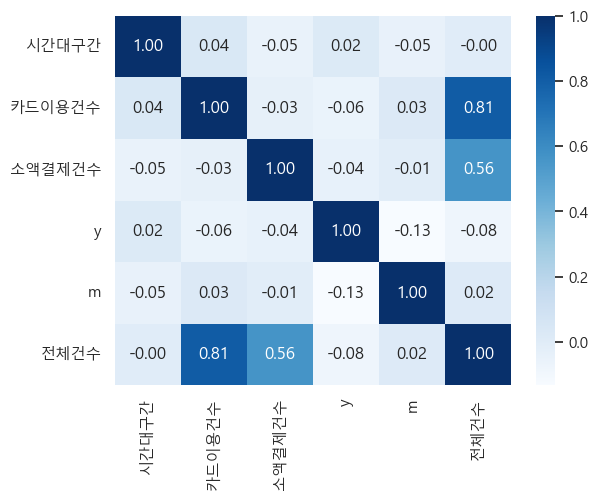

In [32]:
sns.heatmap(df2.corr() ,cmap='Blues', annot=True, fmt='.2f', cbar=True)
plt.show()

# 연도별 & 월별

## 연도별

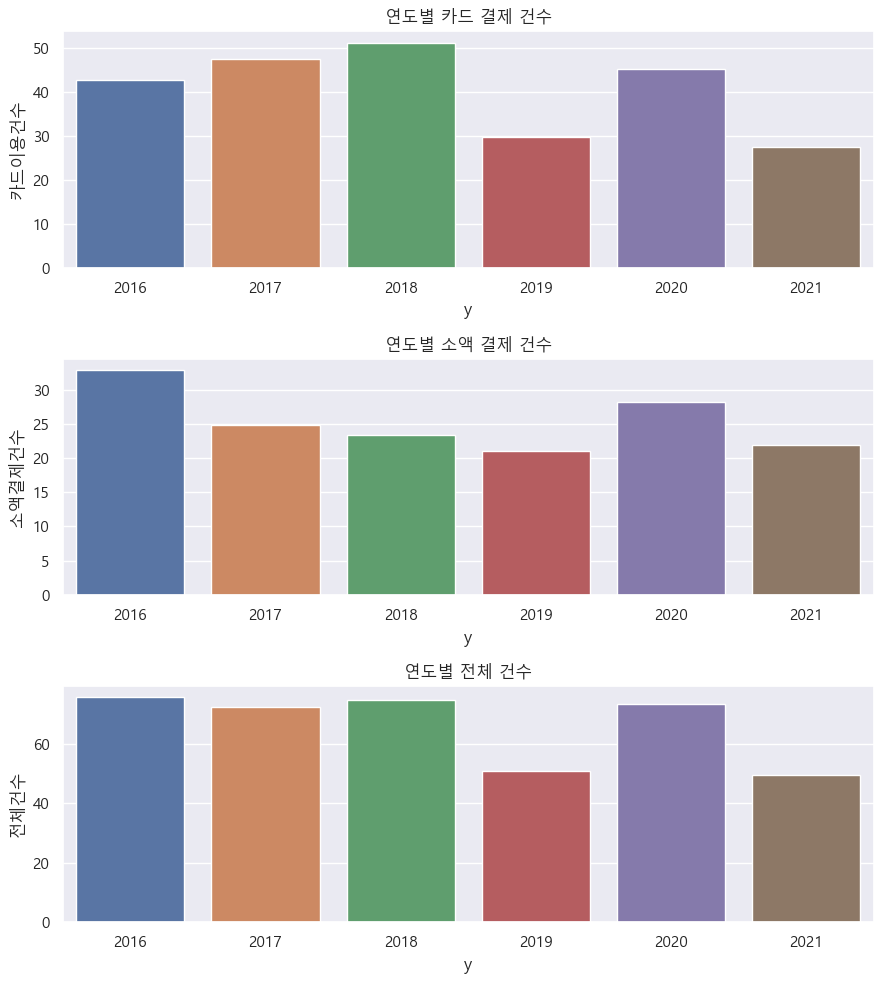

In [33]:
fig,axes = plt.subplots(3,1,figsize=(9,10))
sns.barplot(data=df2, x='y', y='카드이용건수', estimator='mean',errorbar=None,ax=axes[0])
axes[0].set_title('연도별 카드 결제 건수')

sns.barplot(data=df2, x='y', y='소액결제건수', estimator='mean', errorbar=None,ax=axes[1])
axes[1].set_title('연도별 소액 결제 건수')

sns.barplot(data=df2, x='y', y='전체건수', estimator='mean', errorbar=None,ax=axes[2])
axes[2].set_title('연도별 전체 건수')

plt.tight_layout()
plt.show()

- 코로나 이전에 건수가 증가하다가 2019년도에 줄어들고, 코로나시작(2020년) 이후 건수가 늘어서 이상함? -> 금액을 확인

### 연도별 대분류별 결제 건수

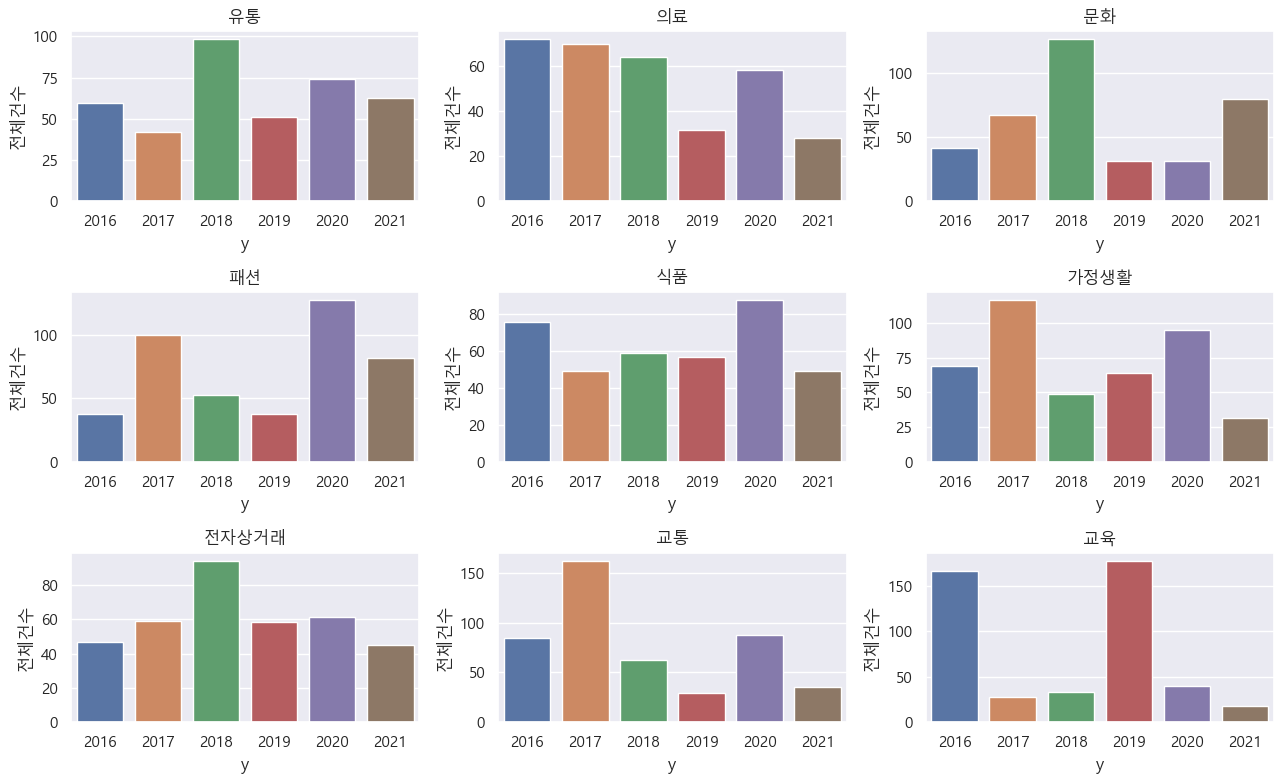

In [34]:
fig,axes = plt.subplots(3,3,figsize=(13,8))
for i, n in enumerate(df2['대분류'].unique()):
    r = i //3
    c = i % 3
    sns.barplot(data=df2[df2['대분류']==n], x='y', y='전체건수', estimator='mean', errorbar=None ,ax=axes[r][c])
    axes[r][c].set_title(n)
plt.tight_layout()
plt.show()

## 월별

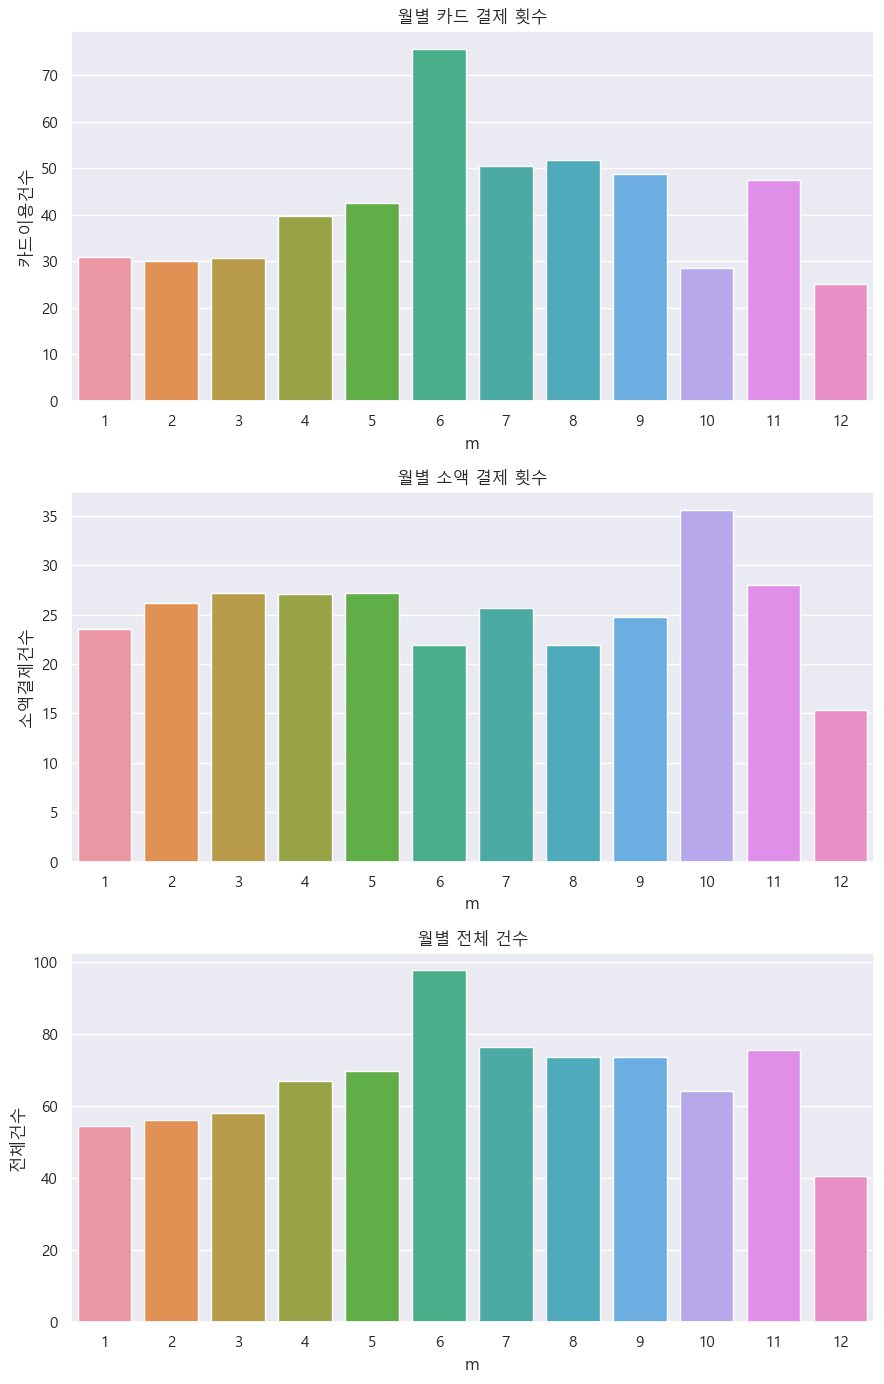

In [35]:
fig,axes = plt.subplots(3,1,figsize=(9,14))
sns.barplot(data=df2, x='m', y='카드이용건수', estimator='mean', errorbar=None,ax=axes[0])
axes[0].set_title('월별 카드 결제 횟수')

sns.barplot(data=df2, x='m', y='소액결제건수', estimator='mean', errorbar=None,ax=axes[1])
axes[1].set_title('월별 소액 결제 횟수')

sns.barplot(data=df2, x='m', y='전체건수', estimator='mean', errorbar=None,ax=axes[2])
axes[2].set_title('월별 전체 건수')

plt.tight_layout()
plt.show()

--> 6월 , 10월에는 카드이용건수와 소액결제 건수가 반대로 가는 경향이 있다
--> 6월, 11월에 전체 건수가 많은편

### 월별 대분류별 결제 건수

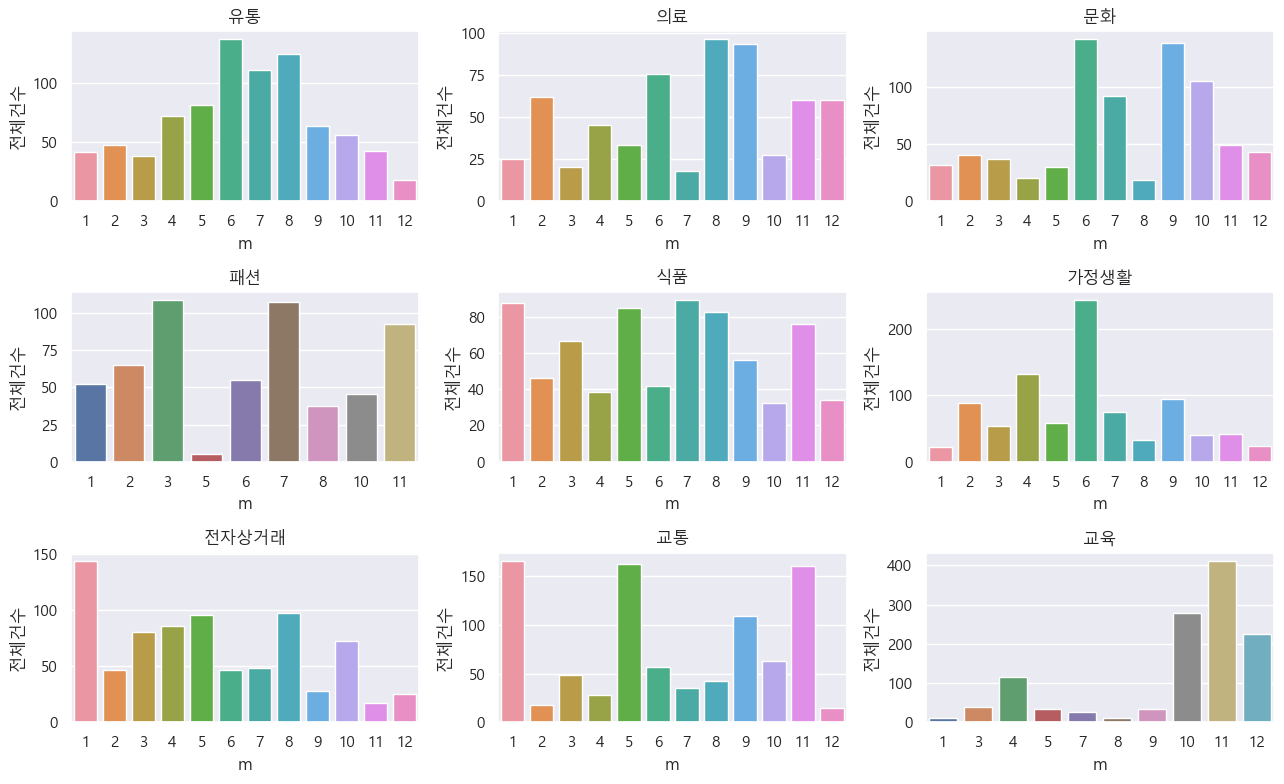

In [36]:
fig,axes = plt.subplots(3,3,figsize=(13,8))
for i, n in enumerate(df2['대분류'].unique()):
    r = i // 3
    c = i % 3
    sns.barplot(data=df2[df2['대분류']==n], x='m', y='전체건수', estimator='mean', errorbar=None ,ax=axes[r][c])
    axes[r][c].set_title(n)
plt.tight_layout()
plt.show()

In [37]:
df2[df2['m']==6][['대분류','전체건수']].groupby('대분류').mean()

,전체건수
대분류,
가정생활,243.750000
교통,56.500000
문화,141.600000
식품,41.571429
유통,137.000000
의료,75.400000
전자상거래,47.000000
패션,55.000000


In [38]:
df2.pivot_table(index="m", columns="대분류", values="전체건수")

대분류,가정생활,교육,교통,문화,식품,유통,의료,전자상거래,패션
m,,,,,,,,,
1,21.428571,10.000000,166.000000,31.363636,87.666667,41.500000,25.000000,144.000000,52.200000
2,89.000000,NaN,17.500000,40.250000,46.375000,47.750000,61.833333,46.250000,65.333333
3,54.333333,40.000000,48.666667,36.571429,66.500000,38.333333,20.000000,80.250000,109.000000
4,132.000000,115.666667,28.333333,20.000000,38.571429,72.200000,45.000000,85.500000,NaN
5,57.750000,35.000000,162.333333,30.000000,84.928571,81.625000,33.333333,95.333333,5.000000
6,243.750000,NaN,56.500000,141.600000,41.571429,137.000000,75.400000,47.000000,55.000000
7,75.500000,25.000000,35.000000,92.375000,89.307692,110.666667,18.000000,48.333333,107.400000
8,33.000000,10.000000,42.500000,18.333333,82.800000,125.000000,96.166667,97.000000,37.500000
9,94.000000,35.000000,109.000000,138.250000,56.000000,63.200000,93.600000,28.000000,NaN


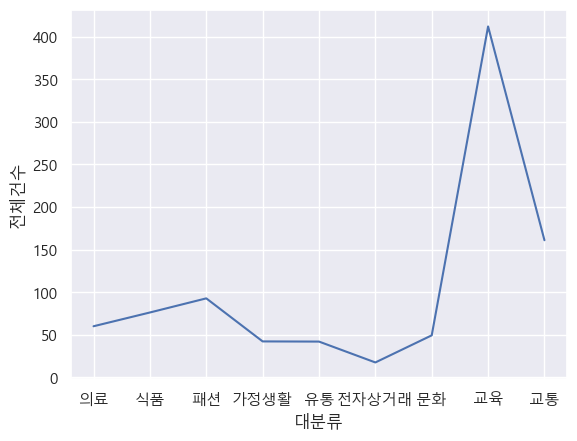

In [39]:
sns.lineplot(data = df2[df2['m']==11] , x="대분류", y="전체건수",errorbar=None)
plt.show()

In [40]:
df2[df2['m']==11][['소분류','전체건수']].sort_values('전체건수',ascending=False)

,소분류,전체건수
140,교육용품,412
329,패스트푸드,312
366,자동차서비스,267
83,미용실,261
139,취미/오락,201
240,자동차서비스,181
143,업무서비스,91
307,편의점,90
231,치과병원,90
7,종합병원,80


In [41]:
df2[df2['m']==11][['소분류','전체건수']].sort_values('전체건수',ascending=False)[:5]

,소분류,전체건수
140,교육용품,412
329,패스트푸드,312
366,자동차서비스,267
83,미용실,261
139,취미/오락,201


- 11월에 특히 교육 건수가 높아서 소분류를 보니 교육용품은 조금씩 여러번 사서 건수가 높은걸로 보여짐

---

# 분류별

In [42]:
df2.sort_values('전체건수',ascending=False).head()

,시간대구간,카드이용건수,소액결제건수,대분류,중분류,소분류,ym,y,m,전체건수
106,1,573,10,유통,할인점/슈퍼마켓,할인점/슈퍼마켓,2018-08-01,2018,8,583
445,3,538,15,가정생활,서비스,생활서비스,2017-06-01,2017,6,553
331,2,30,483,교육,학원,취미/전문학원,2016-10-01,2016,10,513
140,3,50,362,교육,교육용품,교육용품,2019-11-01,2019,11,412
254,3,231,176,교육,교육용품,교육용품,2016-12-01,2016,12,407


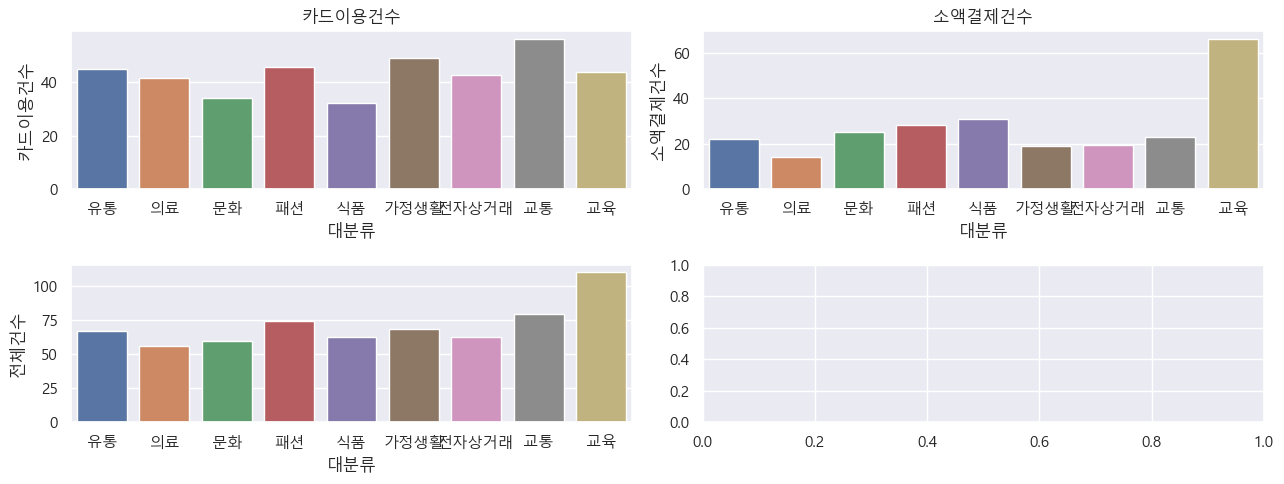

In [43]:
fig,axes = plt.subplots(2,2,figsize=(13,5))
sns.barplot(data=df2, x='대분류', y='카드이용건수', estimator='mean', errorbar=None,ax=axes[0][0])
axes[0][0].set_title('카드이용건수')

sns.barplot(data=df2, x='대분류', y='소액결제건수', estimator='mean', errorbar=None,ax=axes[0][1])
axes[0][1].set_title('소액결제건수')

sns.barplot(data=df2, x='대분류' , y='전체건수', estimator='mean', errorbar = None, ax=axes[1][0])

plt.tight_layout()
plt.show()

- 소액결제, 전체 건수에서 교육 분야에 결제 건수가 많다

## 소분류별 전체건수

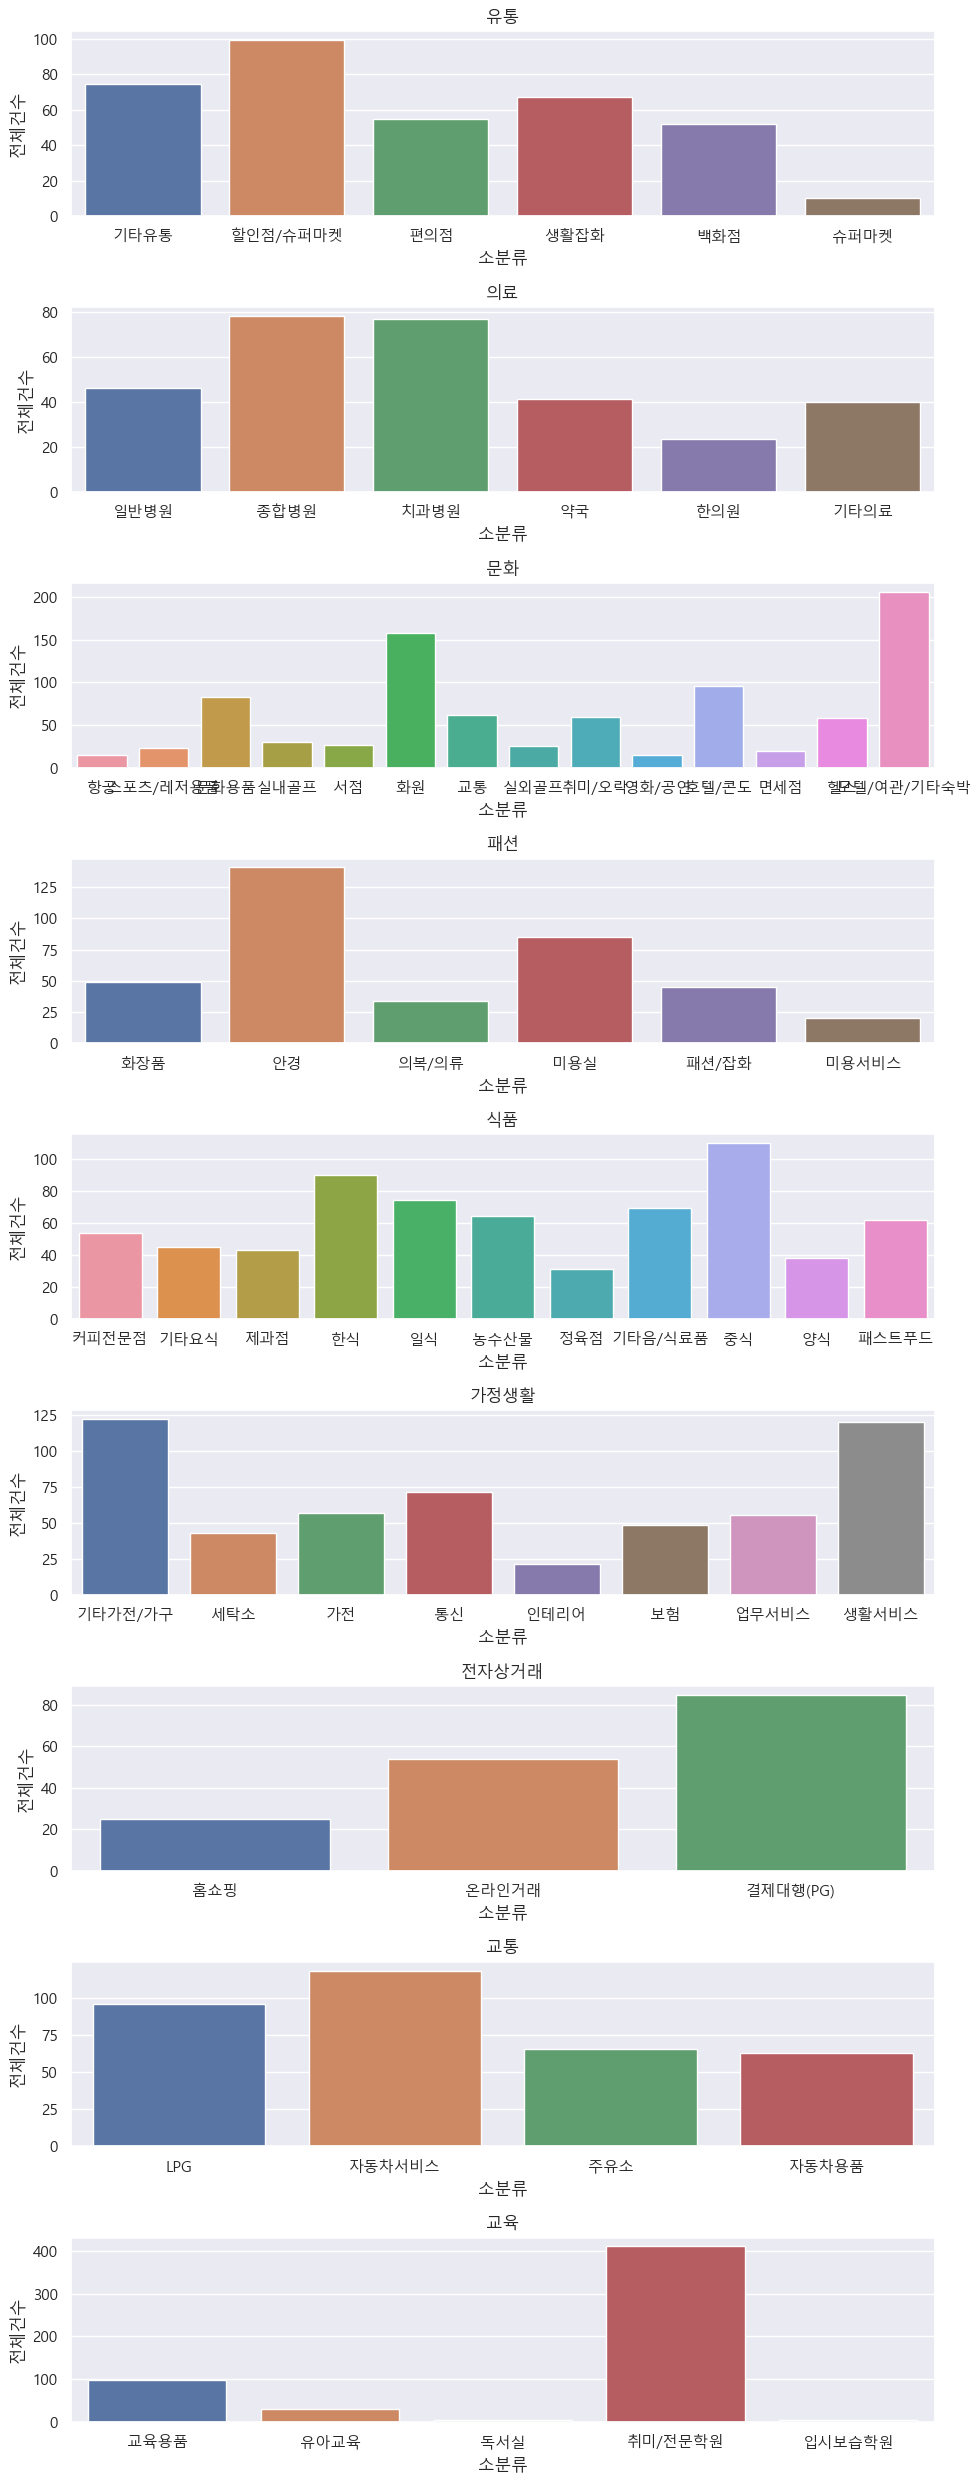

In [44]:
fig,axes = plt.subplots(9,1,figsize=(10,25))
for i, n in enumerate(df2['대분류'].unique()):
    sns.barplot(data=df2[df2['대분류']==n], x='소분류', y='전체건수', estimator='mean', errorbar=None ,ax=axes[i])
    axes[i].set_title(n)
plt.tight_layout()
plt.show()

- 교육에 취미결제가 많은게 의외
- 식품 결제건수에 중국음식이 제일많음

----

# 시간대별

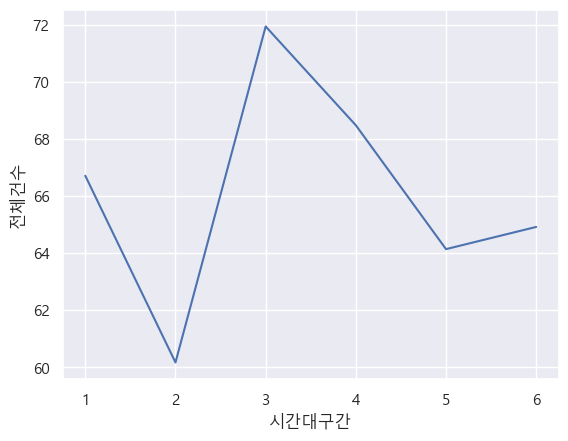

In [45]:
sns.lineplot(data = df2, x='시간대구간', y='전체건수', estimator='mean', errorbar=None )
plt.show()

* 시간대별
<pre>
1: 0-4
2: 5-8
3: 9-12   --> 건수가 많은 시간
4: 13-16  --> 건수가 많은 시간
5: 17-20
6: 21-24

## 낮시간(3,4 시간대) 

### 분류별 낮시간대 전체건수

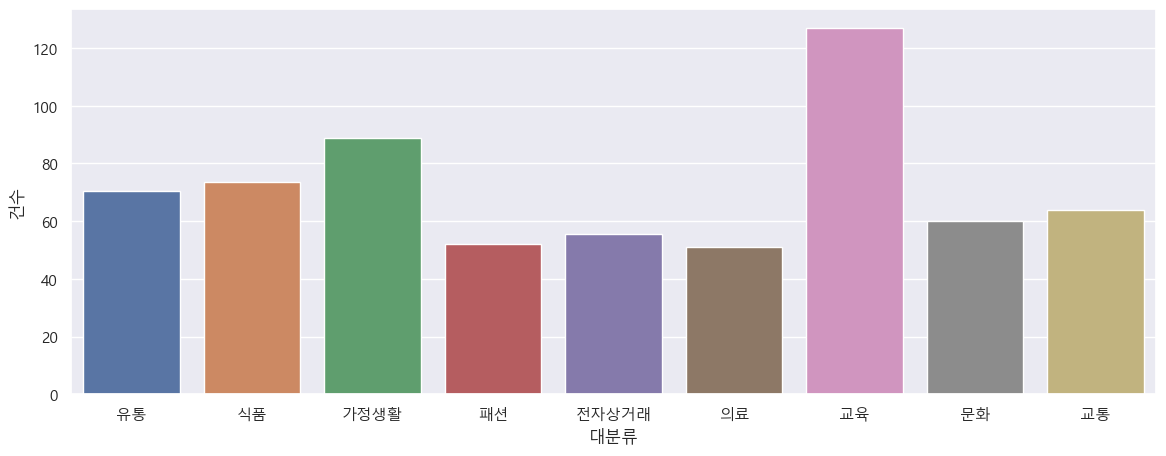

In [46]:
plt.figure(figsize=(14,5))
sns.barplot(data=df2[df2['시간대구간'].isin([3,4])], x='대분류', y='전체건수', estimator= 'mean', errorbar= None) 

plt.xlabel('대분류')
plt.ylabel('건수')
plt.show()

## 낮 시간대(3,4) / 저녁 시간대(5,6) 식품

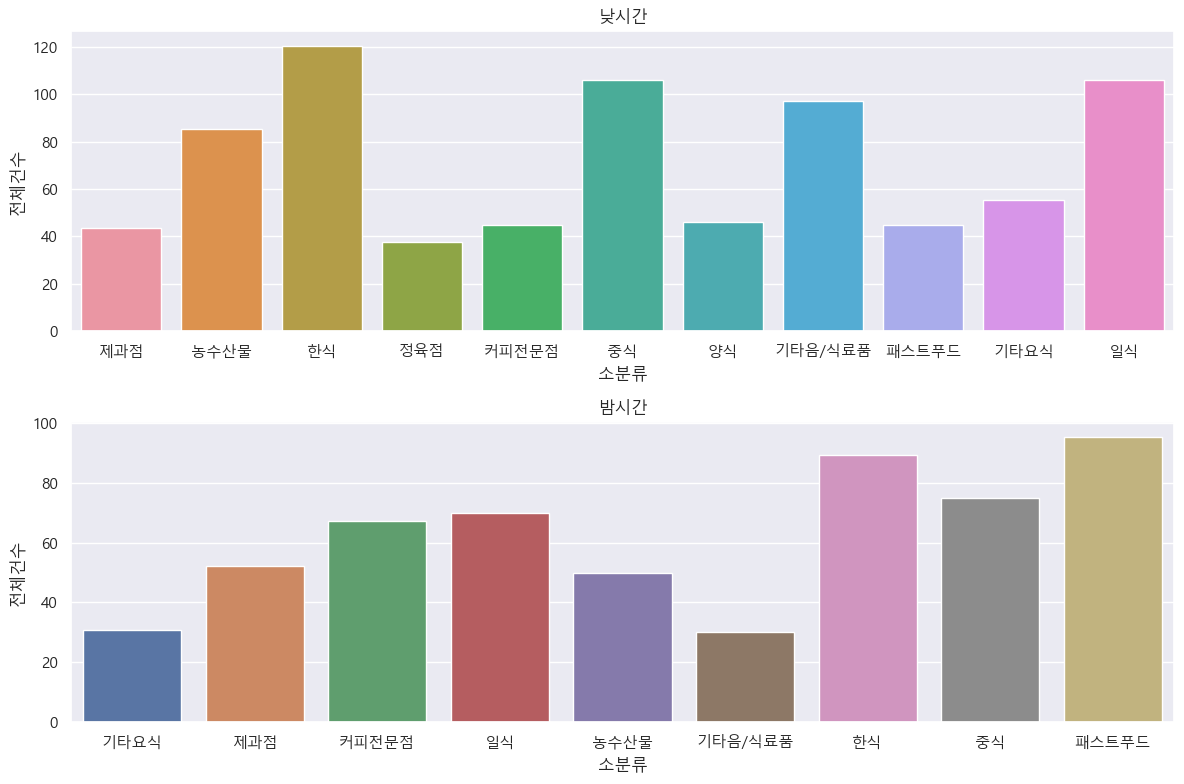

In [60]:
fig,axes = plt.subplots(2,1,figsize=(12,8))

sns.barplot(data = df2[(df2['시간대구간'].isin([3,4]))&(df2['대분류']=='식품')], x='소분류',y='전체건수', errorbar=None,ax=axes[0])
axes[0].set_title('낮시간')
sns.barplot(data = df2[(df2['시간대구간'].isin([5,6]))&(df2['대분류']=='식품')], x='소분류',y='전체건수', errorbar=None,ax=axes[1])
axes[1].set_title('밤시간')

plt.tight_layout()
plt.show()

- 낮에는 한식을 많이 먹고 저녁에는 패스트푸드를 많이먹는다

## 전체 건수(바)와 소액결제(선)를 대분류별로

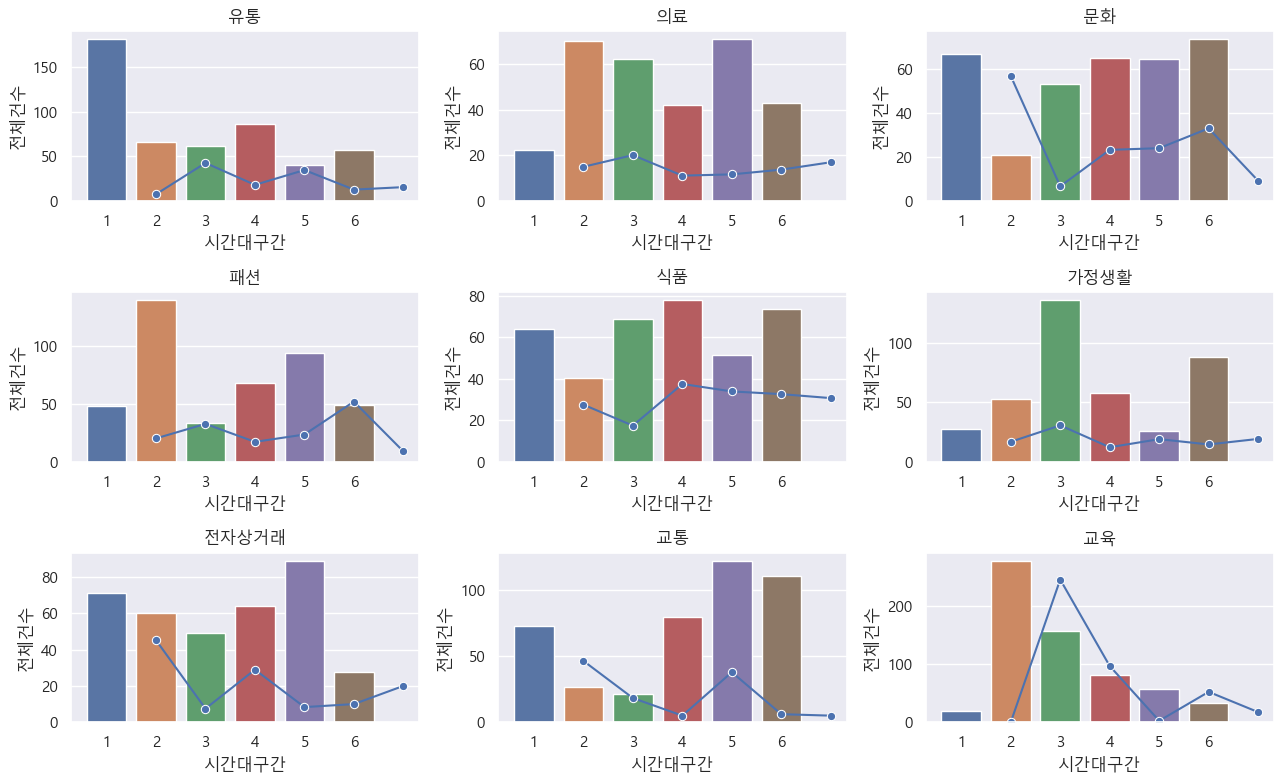

In [48]:
fig,axes = plt.subplots(3,3,figsize=(13,8))
for i, n in enumerate(df2['대분류'].unique()):
    r = i //3
    c = i % 3
    sns.barplot(data=df2[df2['대분류']==n], x='시간대구간', y='전체건수', estimator='mean', errorbar=None ,ax=axes[r][c])
    sns.lineplot(data=df2[df2['대분류']==n], x='시간대구간', y='소액결제건수', estimator='mean', errorbar=None ,ax=axes[r][c],marker='o')
    axes[r][c].set_title(n)
plt.tight_layout()
plt.show()

-----

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시간대구간   500 non-null    int64         
 1   카드이용건수  500 non-null    int64         
 2   소액결제건수  500 non-null    int64         
 3   대분류     500 non-null    object        
 4   중분류     500 non-null    object        
 5   소분류     500 non-null    object        
 6   ym      500 non-null    datetime64[ns]
 7   y       500 non-null    int64         
 8   m       500 non-null    int64         
 9   전체건수    500 non-null    int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 43.0+ KB


In [50]:
df2.columns

Index(['시간대구간', '카드이용건수', '소액결제건수', '대분류', '중분류', '소분류', 'ym', 'y', 'm',
       '전체건수'],
      dtype='object')

In [51]:
ddf = df2[['시간대구간', '카드이용건수', '소액결제건수', 'y', 'm']]

In [52]:
bun = pd.get_dummies(df2['대분류'])
bun.head()

,가정생활,교육,교통,문화,식품,유통,의료,전자상거래,패션
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0


In [53]:
ddf = pd.concat([ddf,bun], axis=1)
ddf.head(2)

,시간대구간,카드이용건수,소액결제건수,y,m,가정생활,교육,교통,문화,식품,유통,의료,전자상거래,패션
0,6,257,25,2020,6,0,0,0,0,0,1,0,0,0
1,6,86,10,2016,8,0,0,0,0,0,1,0,0,0


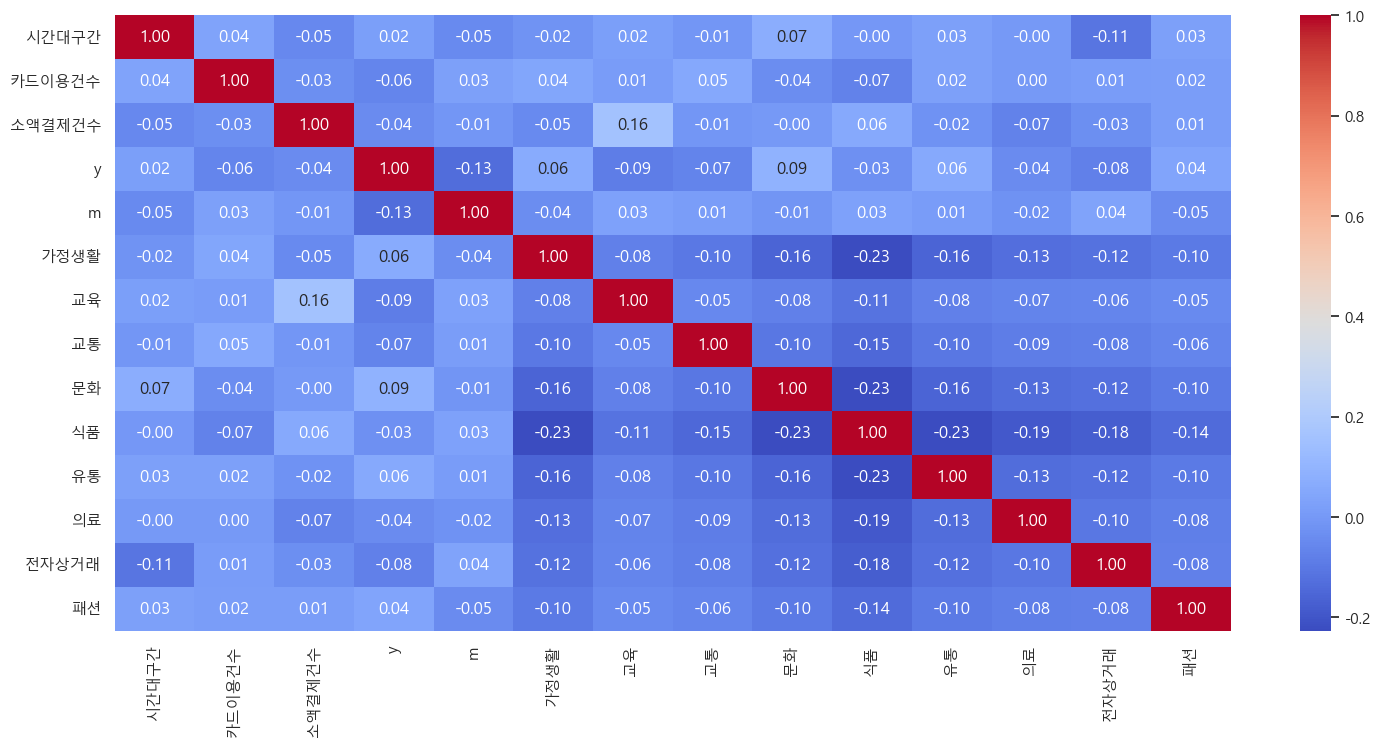

In [66]:
sns.set(rc = {'figure.figsize':(18,8)})
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.heatmap(data=ddf.corr(), cmap='coolwarm', annot=True, fmt='.2f', cbar=True)
plt.show()

----